# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []
rcd = 0
sets = 1

print('\nBeginning Data Retrieval\n-----------------------------\n')

for city in cities:
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1

    url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}&q={city}"
    res = requests.get(url).json()

    try:
        city_data.append({
            'City': city,
            'Lat': res['coord']['lat'],
            'Lng': res['coord']['lon'],
            'Temp': res['main']['temp_max'],
            'Humidity': res['main']['humidity'],
            'Cloudiness': res['clouds']['all'],
            'Wind': res['wind']['speed'],
            'Country': res['sys']['country'],
            'Date': res['dt']        
        })
    except:
        print('City not found. Skipping...')
        pass
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------') 


Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | poum
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | angoche
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | spring valley
Processing Record 11 of Set 1 | carmo do paranaiba
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | orlik
Processing Record 14 of Set 1 | sanchor
Processing Record 15 of Set 1 | pitimbu
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | santa cruz
Processing Record 21 of Set 1 | boa vista
Processing Record 22 of Set 1 | cortez
Processing Rec

Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | buraydah
Processing Record 43 of Set 4 | tigzirt
Processing Record 44 of Set 4 | pahrump
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | tidore
City not found. Skipping...
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | pingliang
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | lethem
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | smolino
Processing Record 3 of Set 5 | warmbad
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | aykhal
Processing Record 6 of Set 5 | aflu
City not found. Skipping...
Processing Record 7 of Set 5 | goderich
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | saint anthony
Processing Record 10 of

Processing Record 26 of Set 8 | berezovyy
Processing Record 27 of Set 8 | chumikan
Processing Record 28 of Set 8 | marcona
City not found. Skipping...
Processing Record 29 of Set 8 | ginda
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | khed brahma
Processing Record 32 of Set 8 | rio gallegos
Processing Record 33 of Set 8 | ketchikan
Processing Record 34 of Set 8 | djambala
Processing Record 35 of Set 8 | aguimes
Processing Record 36 of Set 8 | iracoubo
Processing Record 37 of Set 8 | frunze
Processing Record 38 of Set 8 | bandarbeyla
Processing Record 39 of Set 8 | luganville
Processing Record 40 of Set 8 | asha
Processing Record 41 of Set 8 | sakakah
Processing Record 42 of Set 8 | muswellbrook
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | flin flon
Processing Record 45 of Set 8 | chapais
Processing Record 46 of Set 8 | biloela
Processing Record 47 of Set 8 | grand gaube
Processing Record 48 of Set 8 | kysyl-syr
Process

Processing Record 13 of Set 12 | ubinskoye
Processing Record 14 of Set 12 | malanje
Processing Record 15 of Set 12 | alta floresta
Processing Record 16 of Set 12 | buta
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | placido de castro
Processing Record 19 of Set 12 | manbij
Processing Record 20 of Set 12 | bundaberg
Processing Record 21 of Set 12 | zarubino
Processing Record 22 of Set 12 | pasighat
Processing Record 23 of Set 12 | darhan
Processing Record 24 of Set 12 | sistranda
Processing Record 25 of Set 12 | manokwari
Processing Record 26 of Set 12 | takaka
Processing Record 27 of Set 12 | ugoofaaru
Processing Record 28 of Set 12 | empalme
Processing Record 29 of Set 12 | zaozerne
Processing Record 30 of Set 12 | shingu
Processing Record 31 of Set 12 | alenquer
Processing Record 32 of Set 12 | taksimo
Processing Record 33 of Set 12 | tsabong
Processing Record 34 of Set 12 | sorland
Processing Record 35 of Set 12 | banda aceh
Processing Record 36 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
Cities_df = pd.DataFrame(city_data)
Cities_df.to_csv(output_data_file) 
Cities_df.head()


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,vaini,-21.2000,-175.2000,82.40,89,75,9.22,TO,1612580738
1,rikitea,-23.1203,-134.9692,77.67,75,5,18.99,PF,1612580739
2,mahebourg,-20.4081,57.7000,78.80,83,75,10.36,MU,1612580562
3,saldanha,-33.0117,17.9442,64.42,92,0,15.70,ZA,1612580740
4,poum,-20.2333,164.0167,80.01,70,6,7.09,NC,1612580740


In [5]:
Cities_df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date
0,vaini,-21.2000,-175.2000,82.40,89,75,9.22,TO,1612580738
1,rikitea,-23.1203,-134.9692,77.67,75,5,18.99,PF,1612580739
2,mahebourg,-20.4081,57.7000,78.80,83,75,10.36,MU,1612580562
3,saldanha,-33.0117,17.9442,64.42,92,0,15.70,ZA,1612580740
4,poum,-20.2333,164.0167,80.01,70,6,7.09,NC,1612580740
...,...,...,...,...,...,...,...,...,...
563,puerto carreno,6.1890,-67.4859,80.67,55,35,7.52,CO,1612580603
564,eyl,7.9803,49.8164,69.51,81,48,11.43,SO,1612580579
565,ciudad bolivar,8.1222,-63.5497,78.42,69,100,14.41,VE,1612580870
566,port macquarie,-31.4333,152.9167,86.00,60,100,1.01,AU,1612580870


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
Humidity_over100= Cities_df[(Cities_df['Humidity']>100)]
Humidity_over100

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind,Country,Date


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

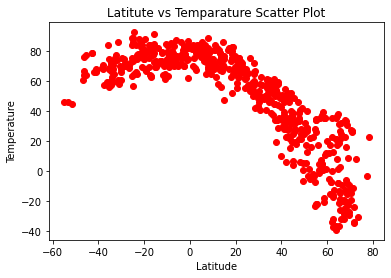

In [8]:
#Latitute vs Temparature Scatter Plot
x_values = [Cities_df['Lat']]
y_values = [Cities_df['Temp']]
plt.scatter(x_values,y_values, color='red', marker='o')
plt.title("Latitute vs Temparature Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

## Latitude vs. Humidity Plot

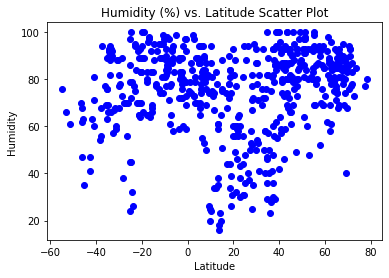

In [9]:
#Humidity (%) vs. Latitude Scatter Plot
x_values = [Cities_df['Lat']]
y_values = [Cities_df['Humidity']]
plt.scatter(x_values,y_values, color='blue', marker='o')
plt.title("Humidity (%) vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

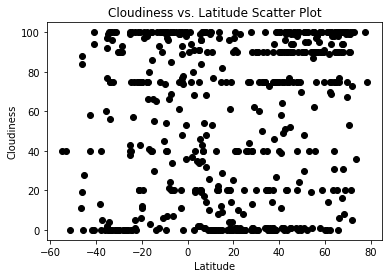

In [10]:
#Cloudiness (%) vs. Latitude Scatter Plot
x_values = [Cities_df['Lat']]
y_values = [Cities_df['Cloudiness']]
plt.scatter(x_values,y_values, color='black', marker='o')
plt.title("Cloudiness vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

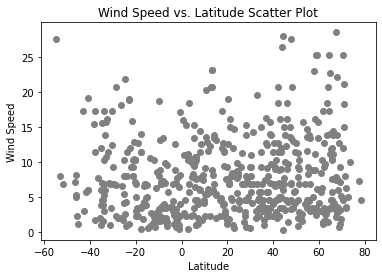

In [11]:
#Wind Speed (mph) vs. Latitude Scatter Plot
x_values = [Cities_df['Lat']]
y_values = [Cities_df['Wind']]
plt.scatter(x_values,y_values, color='gray', marker='o')
plt.title("Wind Speed vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

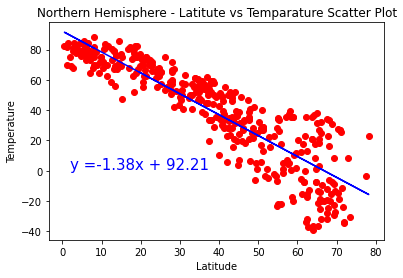

In [12]:
#Northern Hemisphere - Latitute vs Temparature Scatter Plot
filter_values = Cities_df[Cities_df['Lat']>0]
x_values= filter_values['Lat']
y_values = filter_values['Temp']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="blue")

plt.scatter(x_values,y_values, color='red', marker='o')
plt.title("Northern Hemisphere - Latitute vs Temparature Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y =0.3x + 79.46


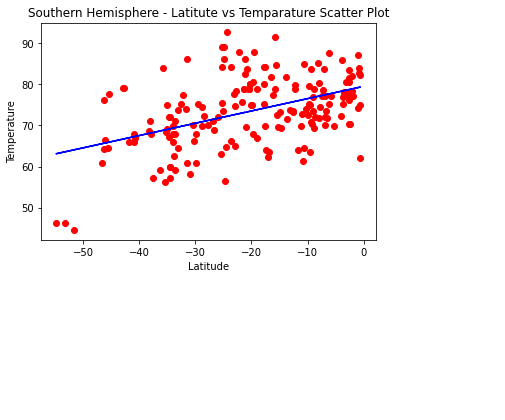

In [13]:
#Southern Hemisphere - Latitute vs Temparature Scatter Plot
filter_values = Cities_df[Cities_df['Lat']<0]
x_values= filter_values['Lat']
y_values = filter_values['Temp']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")

plt.scatter(x_values,y_values, color='red', marker='o')
plt.title("Southern Hemisphere - Latitute vs Temparature Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y =0.3x + 62.65


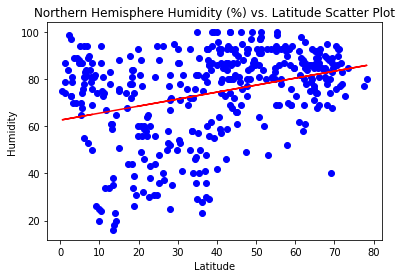

In [14]:
#Northern Hemisphere Humidity (%) vs. Latitude Scatter Plot
filter_values = Cities_df[Cities_df['Lat']>0]
x_values= filter_values['Lat']
y_values = filter_values['Humidity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")


plt.scatter(x_values,y_values, color='blue', marker='o')
plt.title("Northern Hemisphere Humidity (%) vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y =0.39x + 85.9


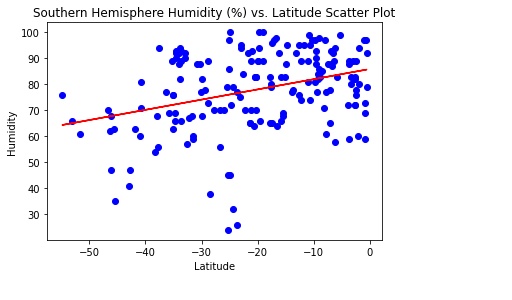

In [15]:
#Southern Hemisphere Humidity (%) vs. Latitude Scatter Plot
filter_values = Cities_df[Cities_df['Lat']<0]
x_values= filter_values['Lat']
y_values = filter_values['Humidity']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")


plt.scatter(x_values,y_values, color='blue', marker='o')
plt.title("Southern Hemisphere Humidity (%) vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y =0.67x + 30.31


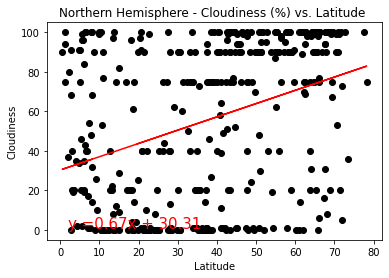

In [16]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
filter_values = Cities_df[Cities_df['Lat']>0]
x_values= filter_values['Lat']
y_values = filter_values['Cloudiness']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")


plt.scatter(x_values,y_values, color='black', marker='o')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y =0.89x + 75.47


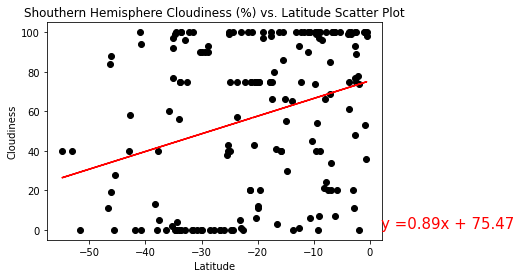

In [17]:
#Shouthern Hemisphere Cloudiness (%) vs. Latitude Scatter Plot
filter_values = Cities_df[Cities_df['Lat']<0]
x_values= filter_values['Lat']
y_values = filter_values['Cloudiness']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")

plt.scatter(x_values,y_values, color='black', marker='o')
plt.title("Shouthern Hemisphere Cloudiness (%) vs. Latitude Scatter Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y =0.02x + 7.53


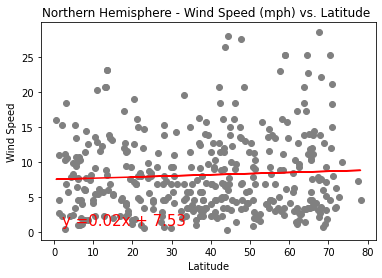

In [18]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regressio
filter_values = Cities_df[Cities_df['Lat']>0]
x_values= filter_values['Lat']
y_values = filter_values['Wind']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")

plt.scatter(x_values,y_values, color='gray', marker='o')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y =-0.12x + 4.44


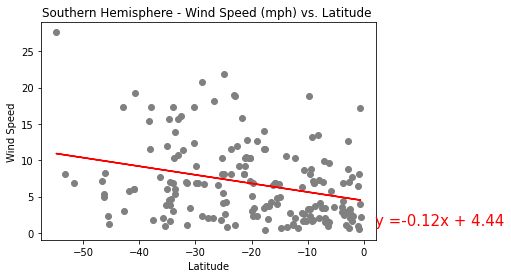

In [19]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regressio
filter_values = Cities_df[Cities_df['Lat']<0]
x_values= filter_values['Lat']
y_values = filter_values['Wind']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1), fontsize=15 , color="red")

plt.scatter(x_values,y_values, color='gray', marker='o')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()